<a href="https://colab.research.google.com/github/Ray-Lai1230/bigdata/blob/main/0518_ipynb_%E9%81%A0%E8%B7%9D%E6%95%99%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(SportsAnalytics)

In [8]:
library(ggplot2)

In [61]:
NBA1718<-fetch_NBAPlayerStatistics("17-18")
NBA1617<-fetch_NBAPlayerStatistics("16-17")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



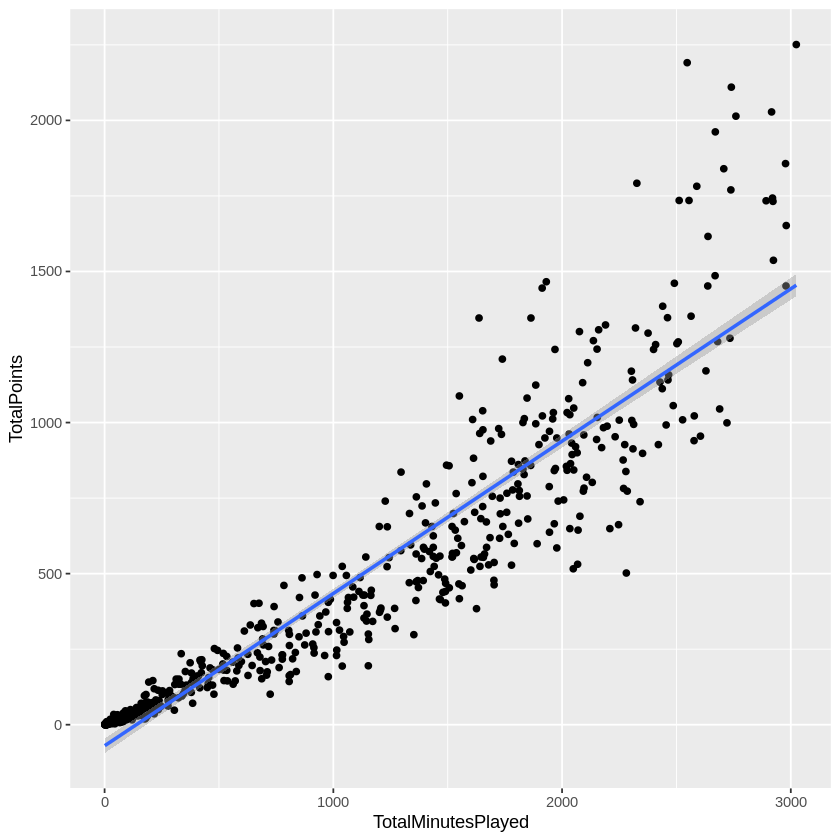

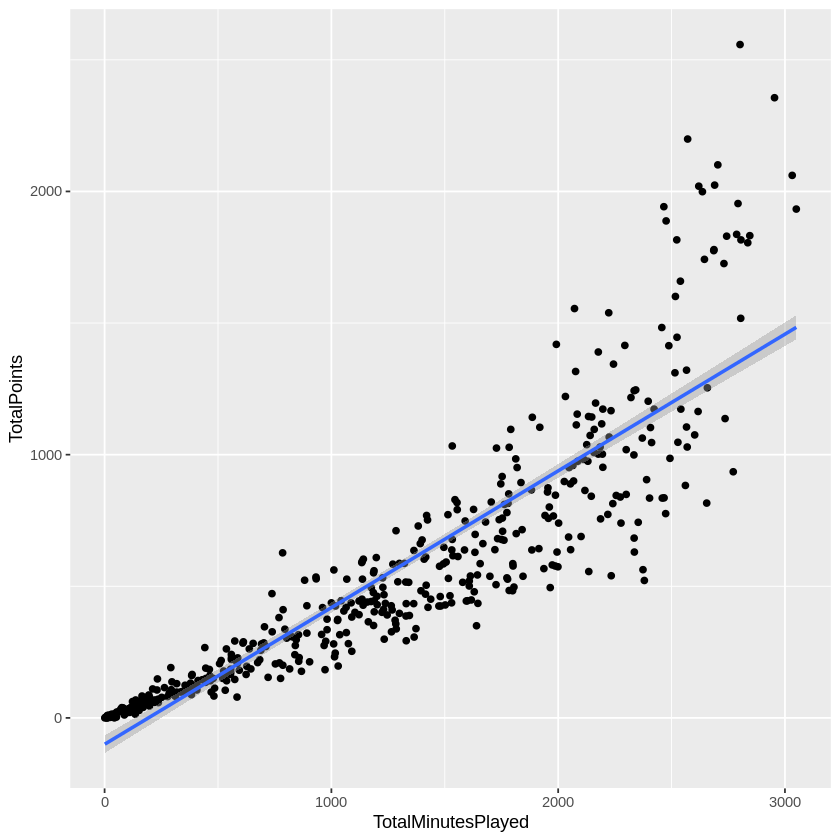

In [62]:
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")
ggplot(NBA1617,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")

In [63]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1718)
lm(TotalPoints~TotalMinutesPlayed,data =NBA1617)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -69.798               0.504  



Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1617)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -100.316               0.519  


In [64]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1718)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =NBA1617)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -12.08194             -0.00901              1.29193  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    1.2e+08 
Residual Deviance: 2180000 	AIC: 6020


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1617)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           -18.7359              -0.0234               1.3461  

Degrees of Freedom: 486 Total (i.e. Null);  484 Residual
Null Deviance:	    1.2e+08 
Residual Deviance: 2400000 	AIC: 5530

In [65]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1718)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1617)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            29.0253              -0.0168               1.3118  
         PositionPF           PositionPG           PositionSF  
           -29.8158             -57.5665             -39.1272  
         PositionSG  
           -58.5594  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    1.2e+08 
Residual Deviance: 2e+06 	AIC: 5970


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1617)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            20.9850              -0.0292               1.3619  
         PositionPF           PositionPG           PositionSF  
           -36.8901             -55.4837             -39.2989  
         PositionSG  
           -53.2848  

Degrees of Freedom: 484 Total (i.e. Null);  478 Residual
  (2 observations deleted due to missingness)
Null Deviance:	    1.2e+08 
Residual Deviance: 2240000 	AIC: 5480

In [22]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [23]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [24]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit~gre+gpa+rank,data=mydata, family="binomial")

In [25]:
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [26]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
library(rpart)

In [29]:
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

In [30]:
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 398 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36.5 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 159.5 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=159.5 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60.5 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60.5 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36.5 431 298 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 151.5 337 238 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  

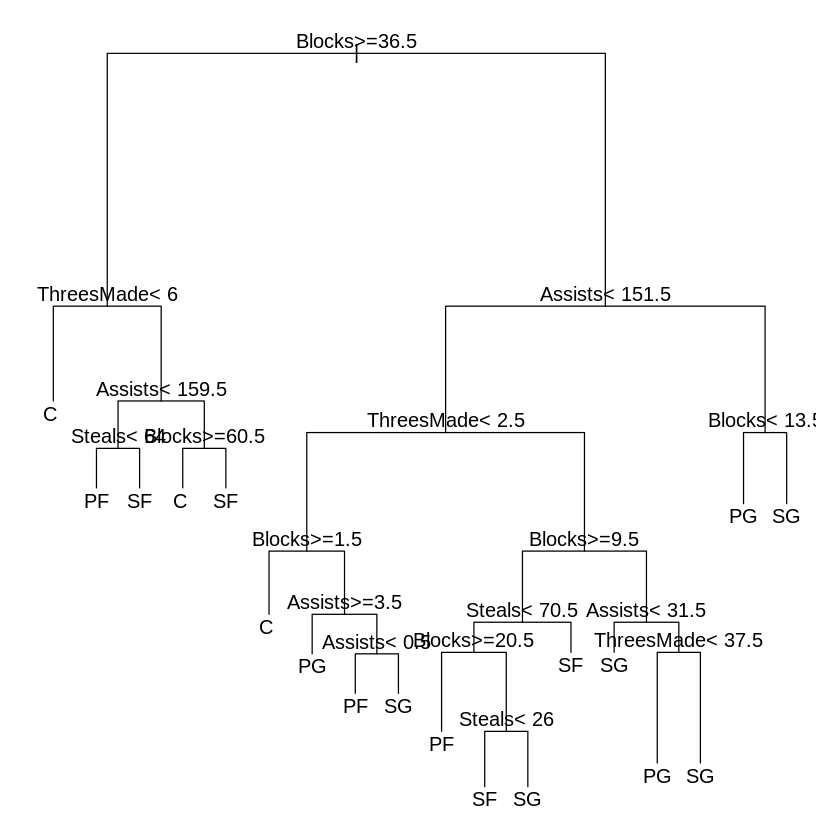

In [31]:
par(mfrow=c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,all=F,cex=1)

In [32]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



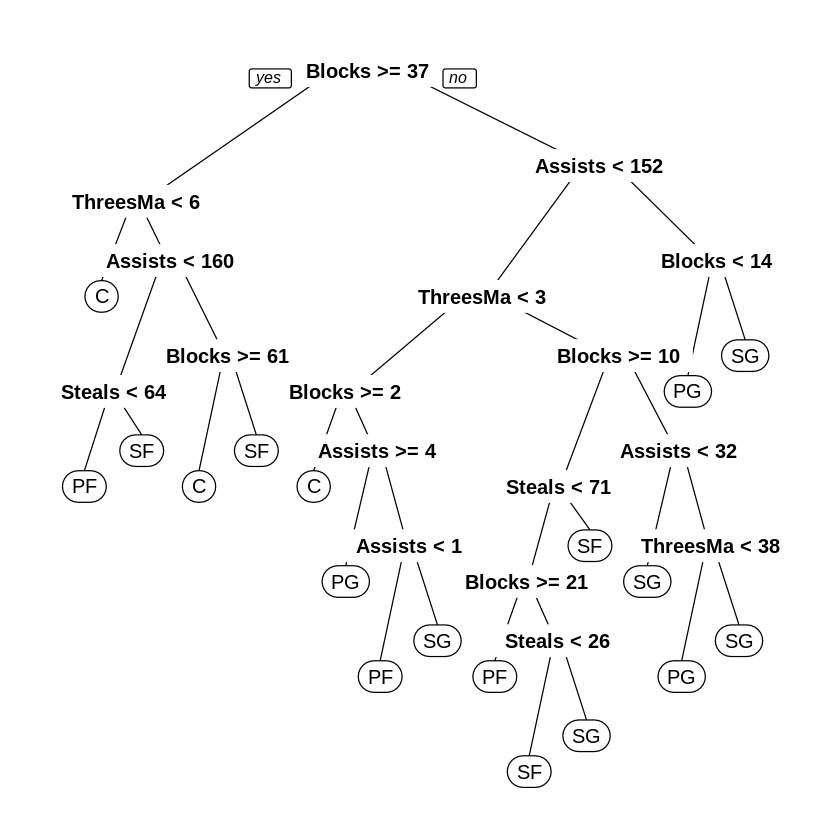

In [34]:
library(rpart.plot)
prp(DT)

In [35]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [36]:
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [39]:
library(datasets)

In [41]:
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [42]:
rules <- apriori(Groceries,parameter=list(supp=0.001,conf=0.8),control=list(verbose=F))
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [43]:
rules<-sort(rules,by="confidence",decreasing=TRUE)
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [44]:
rulesR<-apriori(Groceries,parameter=list(supp=0.001,conf=0.08),appearance=list(default="lhs",rhs="whole milk"),control=list(verbose=F))   #買了什麼的人，會買牛奶
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [50]:
rulesR<-apriori(Groceries,parameter=list(supp=0.001,conf=0.08),appearance=list(default="lhs",rhs="sugar"),control=list(verbose=F))   #買了什麼東西的人，會買糖
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                          rhs     support confidence coverage lift count
[1] {flour,baking powder}     => {sugar} 0.0010  0.56       0.0018   16   10   
[2] {flour,margarine}         => {sugar} 0.0016  0.43       0.0038   13   16   
[3] {flour,soda}              => {sugar} 0.0011  0.39       0.0028   12   11   
[4] {margarine,baking powder} => {sugar} 0.0011  0.37       0.0031   11   11   
[5] {curd,flour}              => {sugar} 0.0011  0.35       0.0032   10   11   


In [55]:
rulesL<-apriori(Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),appearance=list(default="rhs",lhs="whole milk"),control=list(verbose=F))  #買了牛奶的人會買什麼
rulesL<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs                          rhs     support confidence coverage lift count
[1] {flour,baking powder}     => {sugar} 0.0010  0.56       0.0018   16   10   
[2] {flour,margarine}         => {sugar} 0.0016  0.43       0.0038   13   16   
[3] {flour,soda}              => {sugar} 0.0011  0.39       0.0028   12   11   
[4] {margarine,baking powder} => {sugar} 0.0011  0.37       0.0031   11   11   
[5] {curd,flour}              => {sugar} 0.0011  0.35       0.0032   10   11   


In [56]:
rulesL<-apriori(Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),appearance=list(default="rhs",lhs="bottled beer"),control=list(verbose=F))  #買了啤酒的人，會買甚麼
rulesL<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs                          rhs     support confidence coverage lift count
[1] {flour,baking powder}     => {sugar} 0.0010  0.56       0.0018   16   10   
[2] {flour,margarine}         => {sugar} 0.0016  0.43       0.0038   13   16   
[3] {flour,soda}              => {sugar} 0.0011  0.39       0.0028   12   11   
[4] {margarine,baking powder} => {sugar} 0.0011  0.37       0.0031   11   11   
[5] {curd,flour}              => {sugar} 0.0011  0.35       0.0032   10   11   
